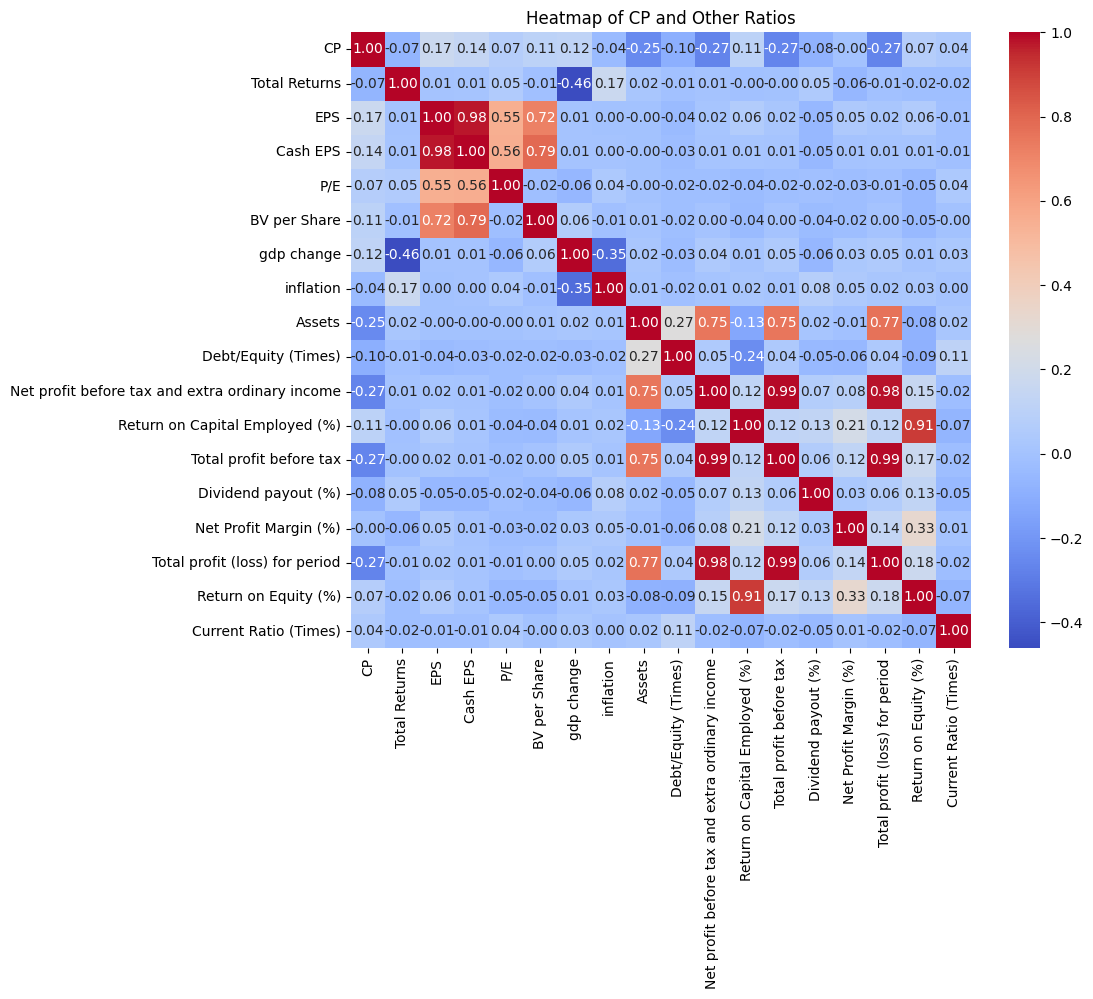

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# File path
file_path = 'stacked_yearwise_output.xlsx'

def plot_heatmap(data):
    plt.figure(figsize=(10, 8))
    a = sns.heatmap(data,annot=True,cmap = "coolwarm",fmt='0.2f')
    plt.title("Heatmap of CP and Other Ratios")
    plt.savefig('heatmap_before_standardization.png', dpi = 300)
    plt.show()
data = pd.read_excel(file_path)
data.head()
corr_matrix = data.corr()
plot_heatmap(corr_matrix)

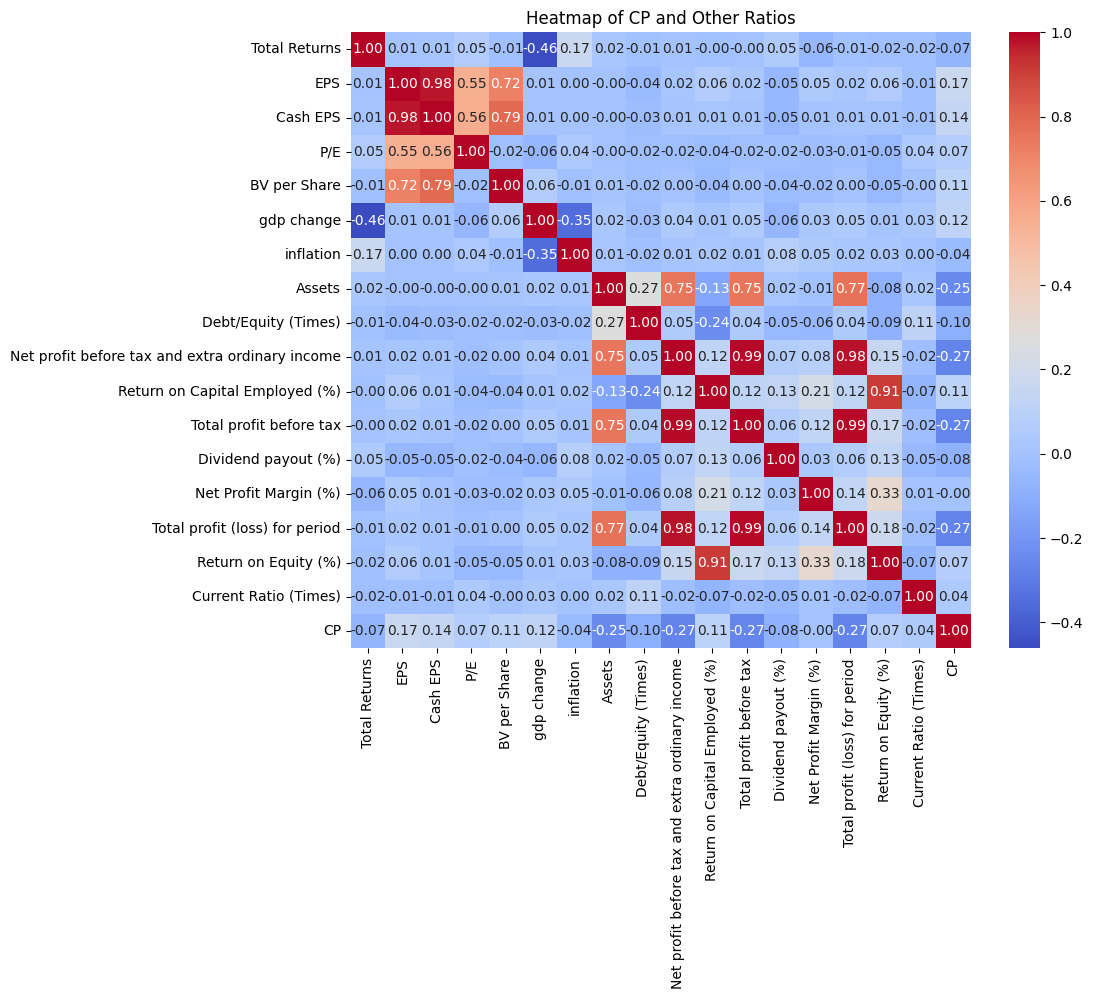

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
other = data.drop(columns=["CP"])
standardized_data = pd.DataFrame(scaler.fit_transform(other), columns=other.columns)
standardized_data["CP"]=data["CP"]
corr_matrix_standardized = standardized_data.corr()
plot_heatmap(corr_matrix_standardized)

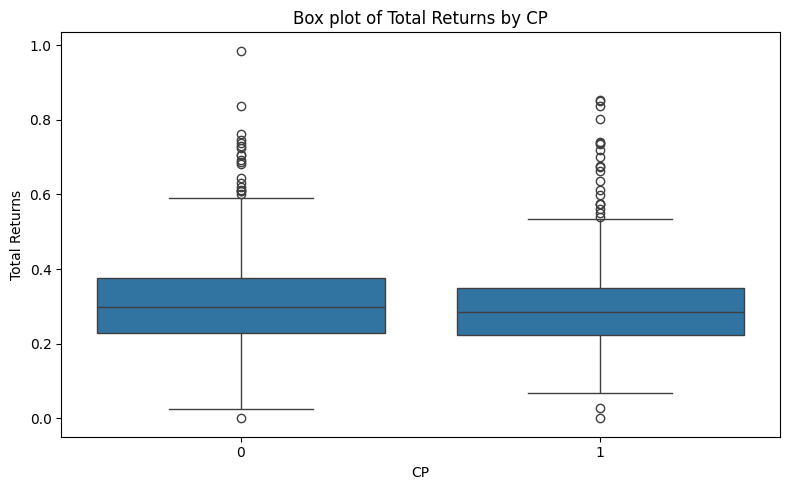

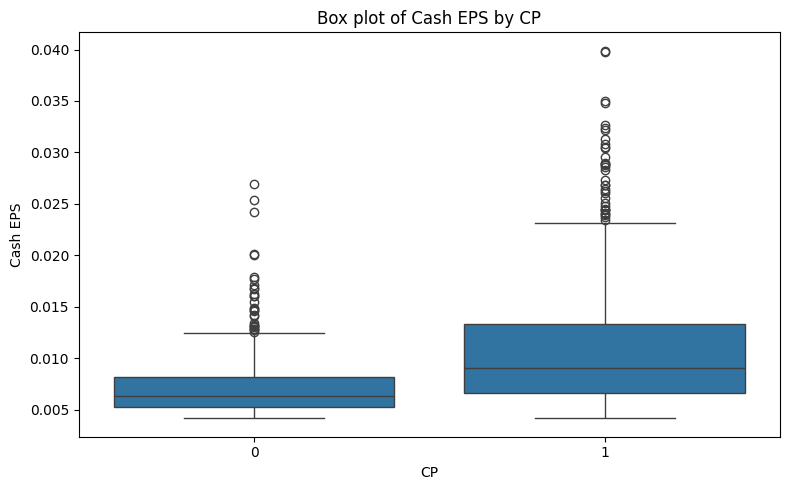

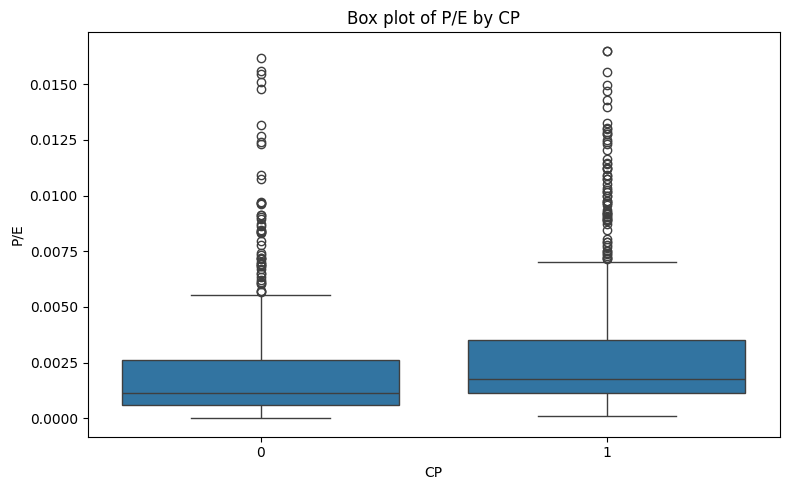

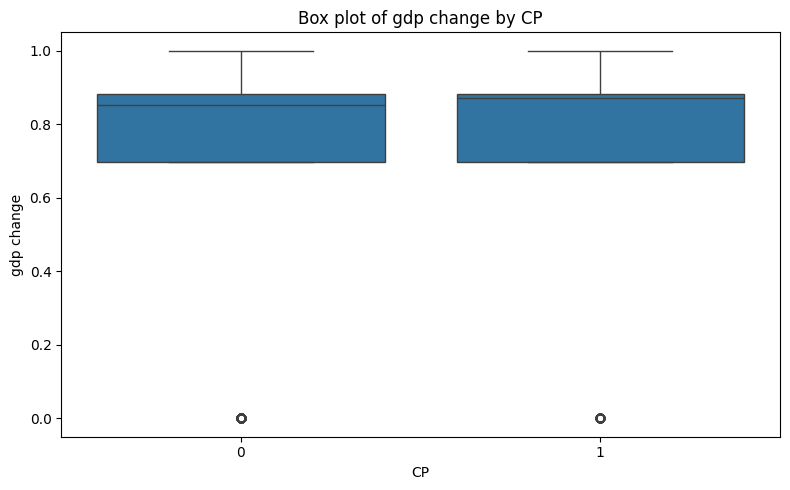

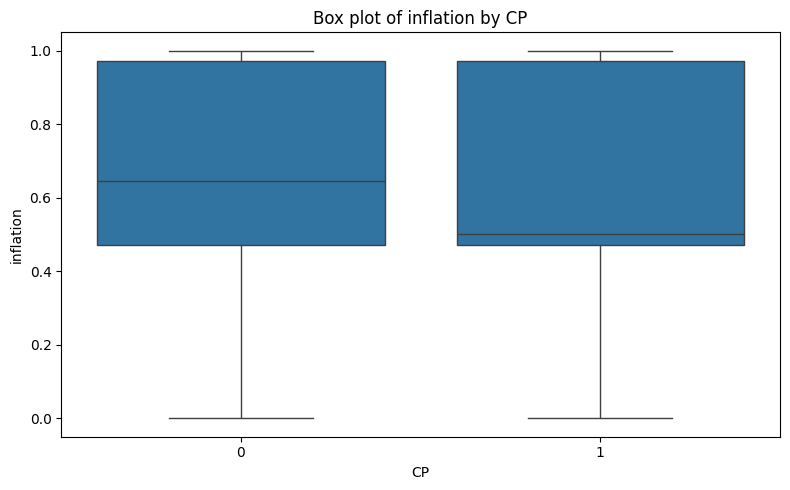

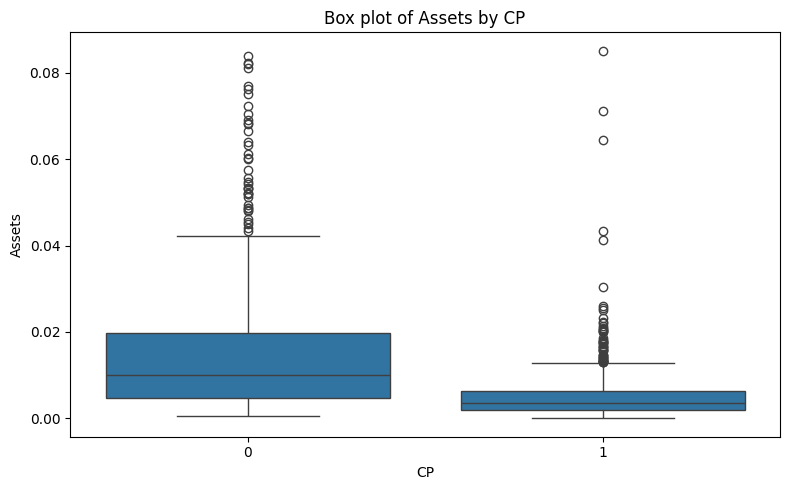

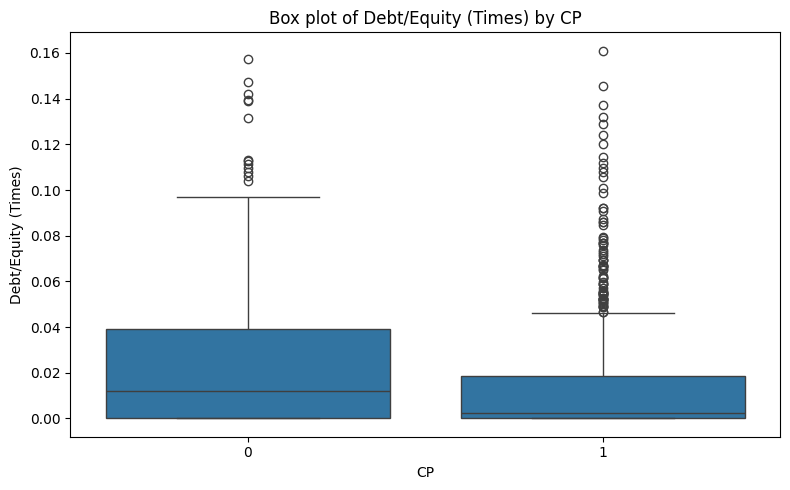

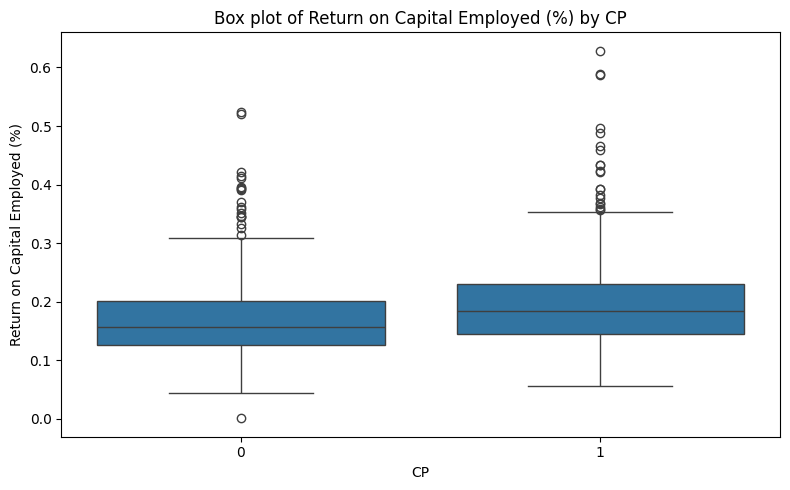

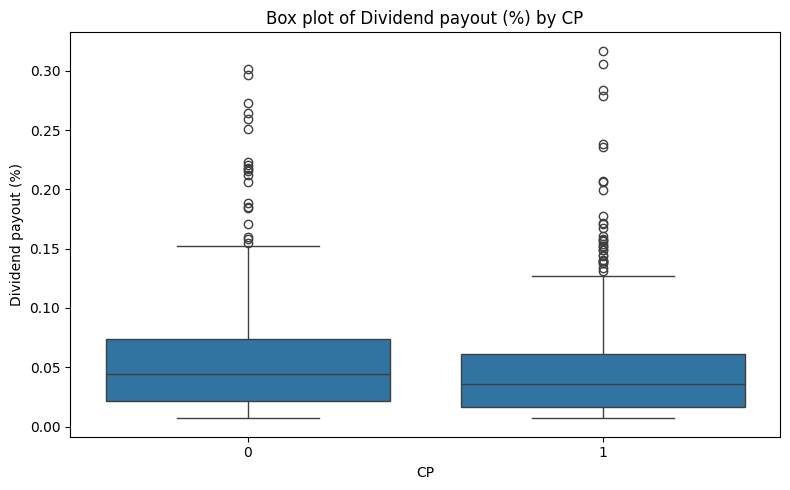

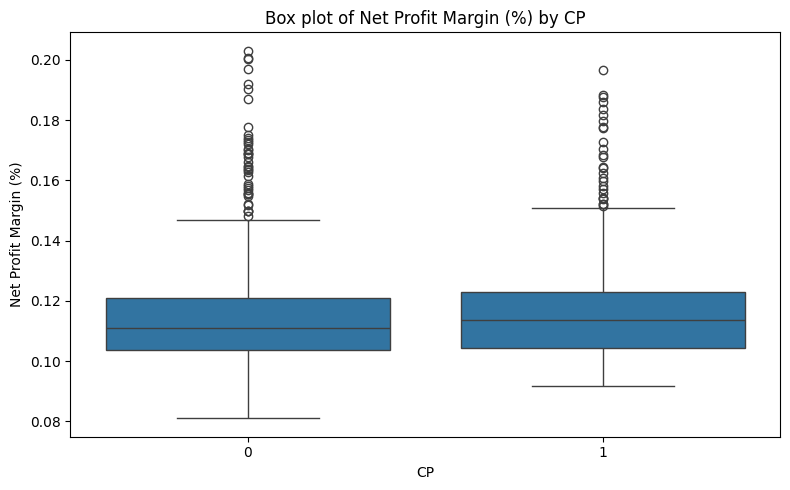

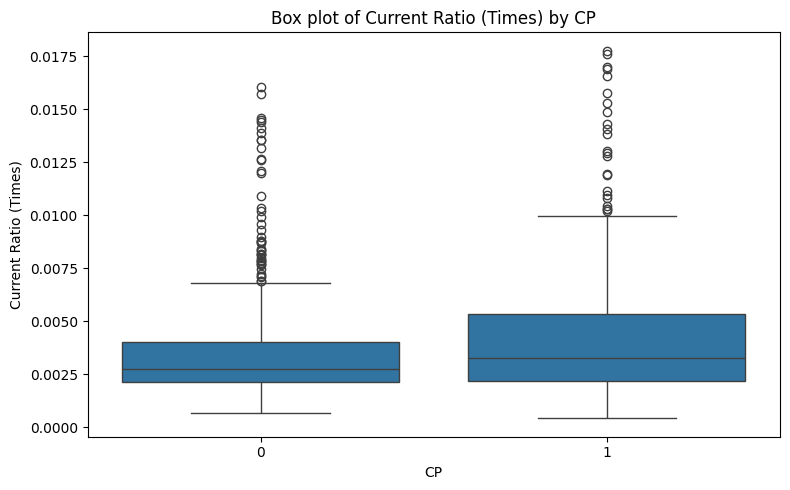

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def boxplots_by_label(df, label_column):
    # Drop non-numeric columns except the label
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    
    if label_column not in df.columns:
        raise ValueError(f"Label column '{label_column}' not found in the dataframe.")
    
    if label_column in numeric_features:
        numeric_features.remove(label_column)

    for feature in numeric_features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=label_column, y=feature)
        plt.title(f'Box plot of {feature} by {label_column}')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    boxplots_by_label(filtered_data, 'CP')


C:\Users\User\AppData\Local\Temp\ipykernel_25404\2808115274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


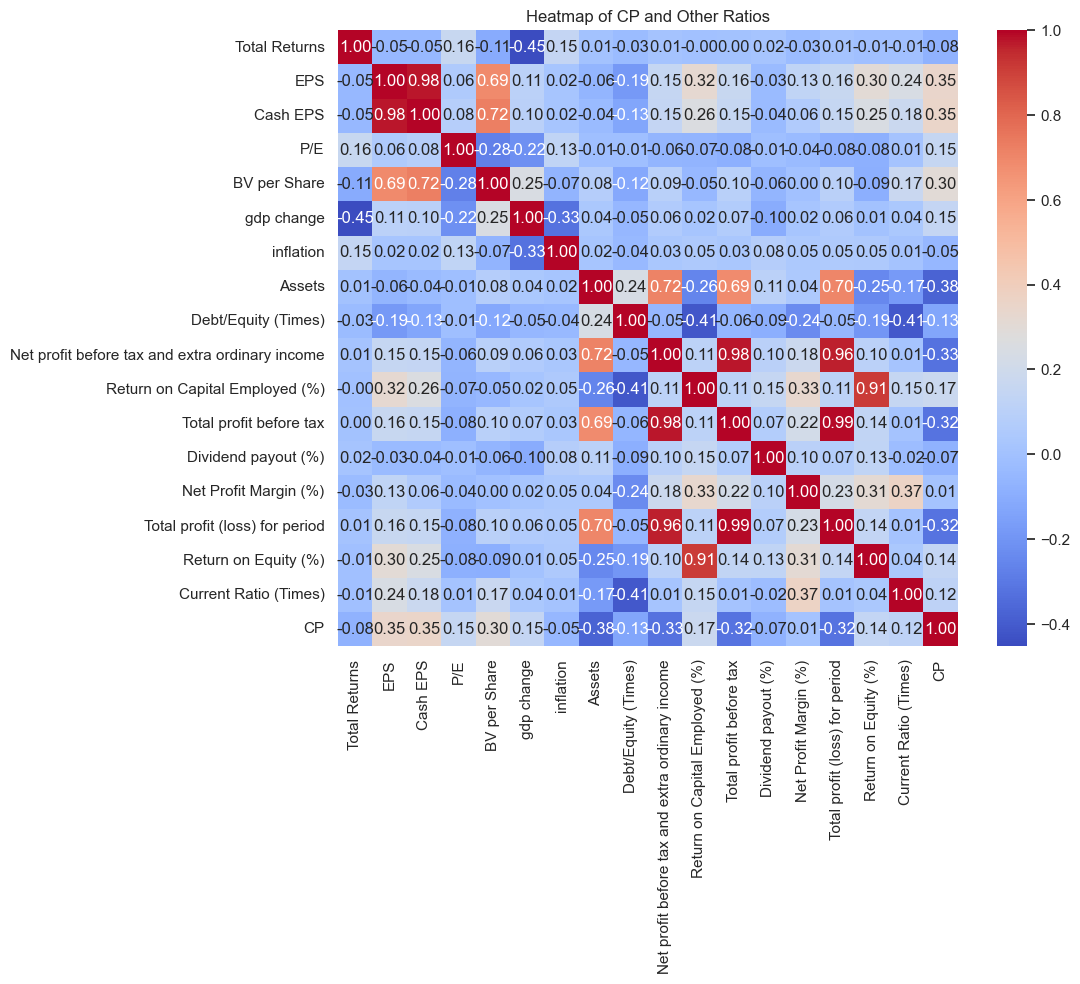

In [63]:
def remove_outliers(df, columns, threshold=1.5):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[~((df[columns] < (Q1 - threshold * IQR)) | (df[columns] > (Q3 + threshold * IQR))).any(axis=1)]
    return filtered_df
filtered_data = remove_outliers(df = standardized_data, columns=standardized_data.columns, threshold=5.0)

filtered_data.dropna(inplace=True)
corr_matrix_filtered = filtered_data.corr()
#boxplots_by_label(filtered_data, 'CP')
plot_heatmap(corr_matrix_filtered)

C:\Users\User\AppData\Local\Temp\ipykernel_25404\1793435970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=[


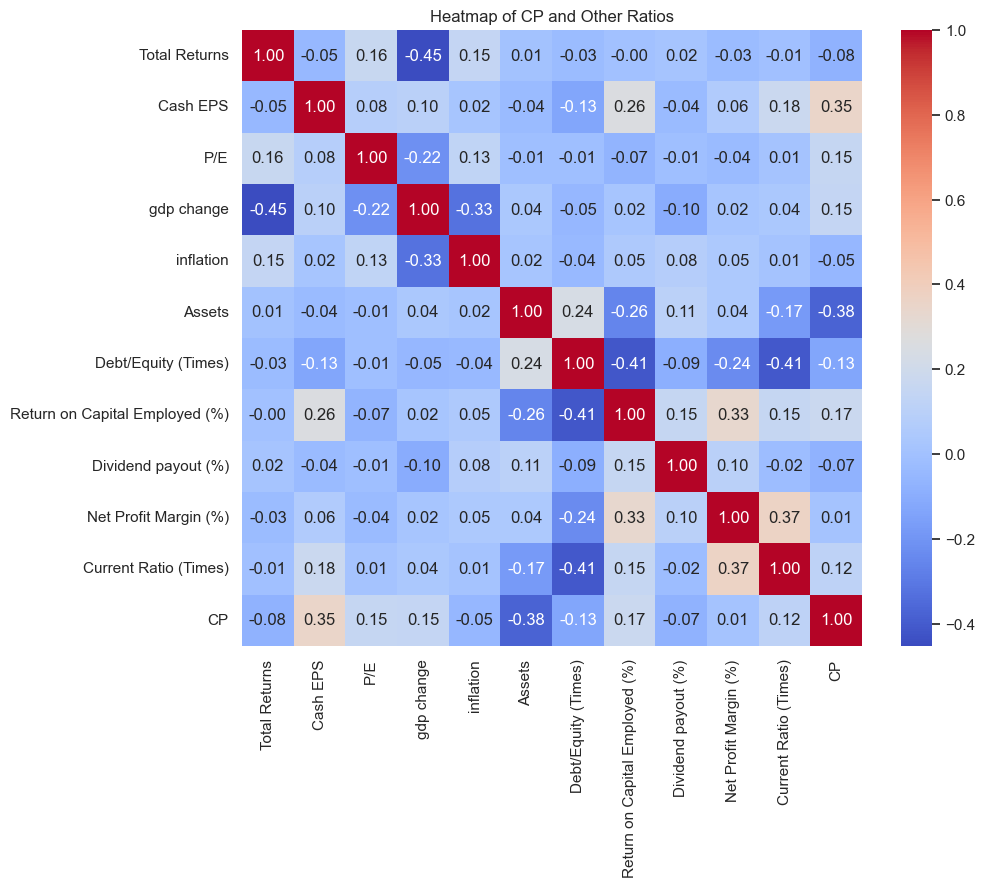

In [64]:
filtered_data.drop(columns=[
                    #"Cash EPS",
                    #"gdp change",
                   "BV per Share",
                   "EPS",
                    "Net profit before tax and extra ordinary income",
                   #"Assets",
                   "Return on Equity (%)", 
                   "Total profit before tax",
                   "Total profit (loss) for period"
],inplace=True)
plot_heatmap(filtered_data.corr())

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = filtered_data.drop(columns=["CP"])  # Features
y = filtered_data["CP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_probs = model.predict(X_test)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.86      0.83      0.85       163

    accuracy                           0.85       324
   macro avg       0.85      0.85      0.85       324
weighted avg       0.85      0.85      0.85       324



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
}

In [71]:
model = models["K-Nearest Neighbors"]
model.fit(X_train, y_train)

# Predict on test data
y_probs = model.predict(X_test)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57       161
           1       0.58      0.61      0.60       163

    accuracy                           0.58       324
   macro avg       0.58      0.58      0.58       324
weighted avg       0.58      0.58      0.58       324



In [69]:
model = models["Logistic Regression"]
model.fit(X_train, y_train)

# Predict on test data
y_probs = model.predict(X_test)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       161
           1       0.72      0.80      0.76       163

    accuracy                           0.74       324
   macro avg       0.74      0.74      0.74       324
weighted avg       0.74      0.74      0.74       324



In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = models["Naive Bayes"]
model.fit(X_train_s, y_train_s)

# Predict on test data
y_probs = model.predict(X_test_s)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test_s, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.43      0.57       161
           1       0.62      0.91      0.74       163

    accuracy                           0.67       324
   macro avg       0.72      0.67      0.65       324
weighted avg       0.72      0.67      0.65       324



In [70]:
model = models["Support Vector Machine"]
model.fit(X_train, y_train)

# Predict on test data
y_probs = model.predict(X_test)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63       161
           1       0.64      0.69      0.66       163

    accuracy                           0.65       324
   macro avg       0.65      0.64      0.64       324
weighted avg       0.65      0.65      0.64       324



In [79]:
model = models["Gradient Boost"]
model.fit(X_train, y_train)

# Predict on test data
y_probs = model.predict(X_test)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       161
           1       0.84      0.84      0.84       163

    accuracy                           0.84       324
   macro avg       0.84      0.84      0.84       324
weighted avg       0.84      0.84      0.84       324



In [74]:
model = models["Decision Tree"]
model.fit(X_train, y_train)

# Predict on test data
y_probs = model.predict(X_test)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       161
           1       0.79      0.80      0.80       163

    accuracy                           0.80       324
   macro avg       0.80      0.80      0.80       324
weighted avg       0.80      0.80      0.80       324



In [76]:
model = models["Extra Trees"]
model.fit(X_train, y_train)

# Predict on test data
y_probs = model.predict(X_test)
ac = accuracy_score(y_test,y_probs)
print("\nClassification Report:\n", classification_report(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       161
           1       0.82      0.79      0.81       163

    accuracy                           0.81       324
   macro avg       0.81      0.81      0.81       324
weighted avg       0.81      0.81      0.81       324



In [78]:
from sklearn.neural_network import MLPClassifier

# Scale features (important for MLP!)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                          max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test_scaled)

print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


MLP Classifier Accuracy: 0.8240740740740741
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       161
           1       0.83      0.82      0.82       163

    accuracy                           0.82       324
   macro avg       0.82      0.82      0.82       324
weighted avg       0.82      0.82      0.82       324



C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


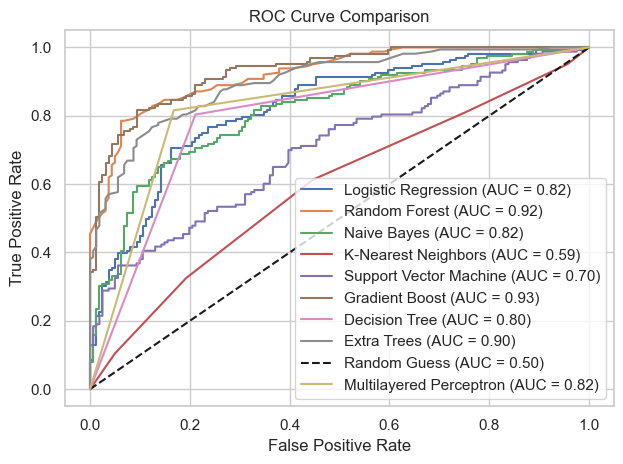

In [77]:
from sklearn.metrics import roc_curve, auc
for i, (name, model) in enumerate(models.items()):
    if(name=="Naive Bayes"):
        model.fit(X_train_s, y_train_s)
        y_probs = model.predict_proba(X_test_s)[:, 1]
    
    # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_s, y_probs)
    else:
        
        model.fit(X_train, y_train)

# Predict on test data
        y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Random guess line

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
# y_pred_mlp = mlp_model.predict(X_test_scaled)
# fpr, tpr, _ = roc_curve(y_test, y_pred_mlp)
# roc_auc = auc(fpr, tpr)
# name = "Multilayered Perceptron"
# plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Formatting
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("ROC_Curves.png",dpi=300)
plt.show()

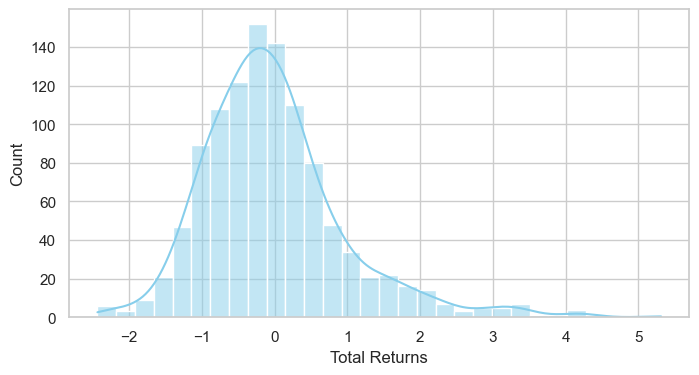

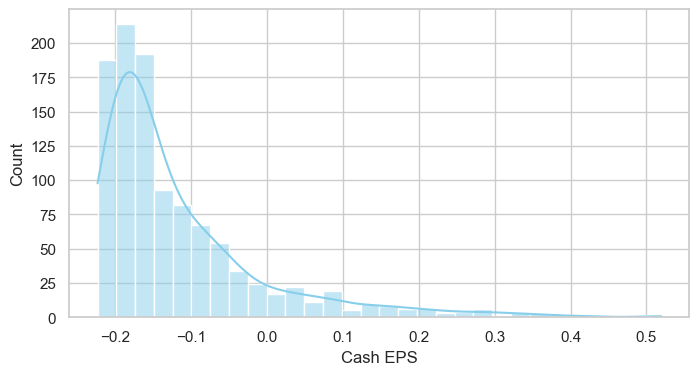

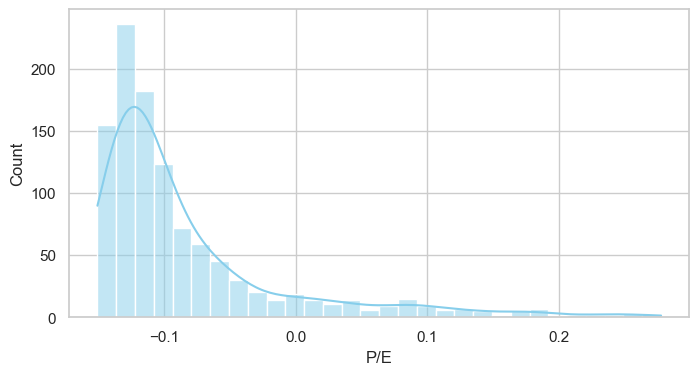

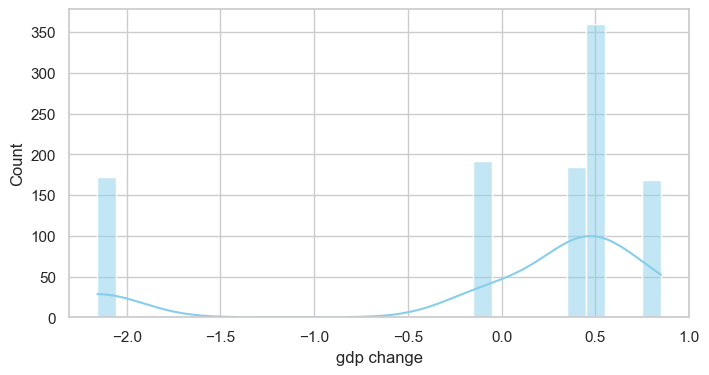

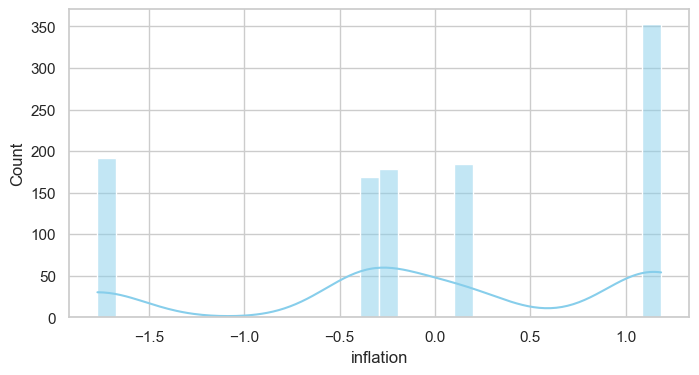

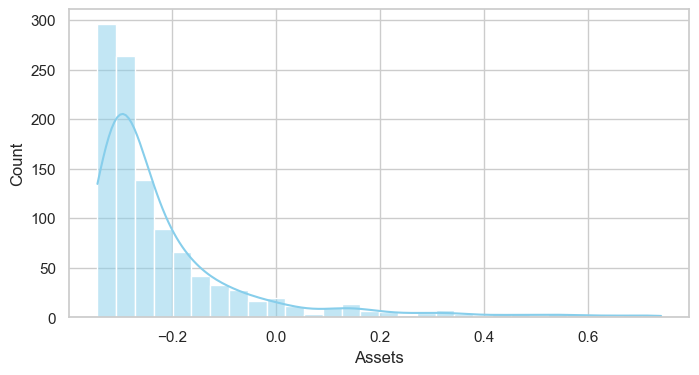

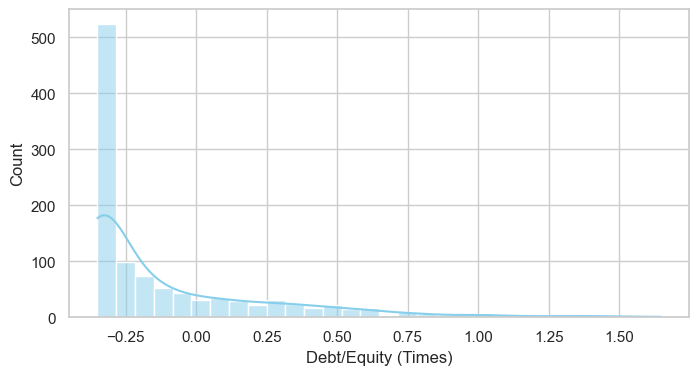

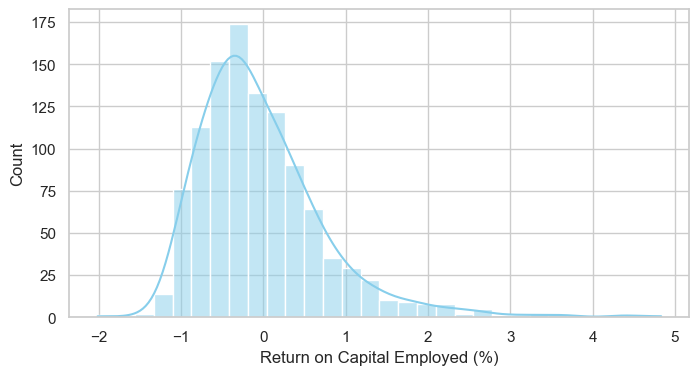

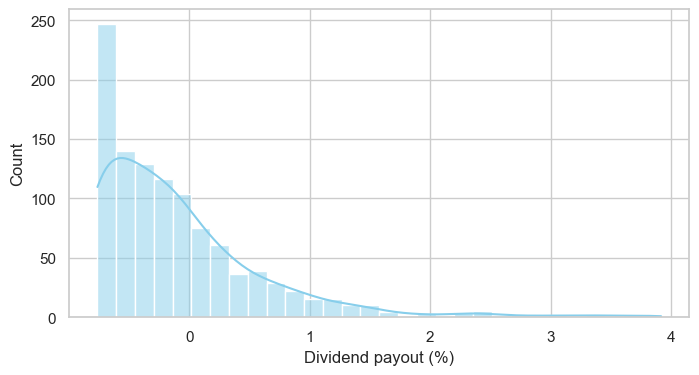

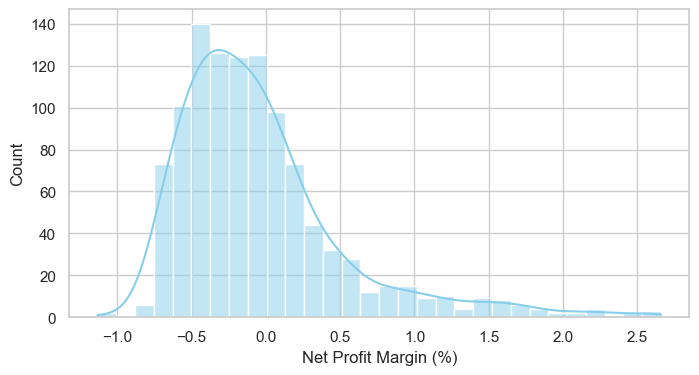

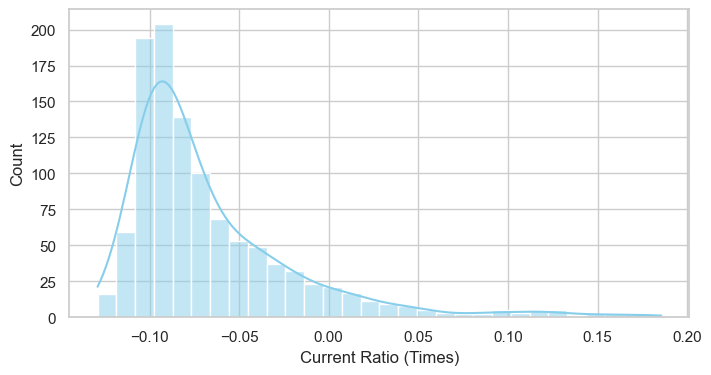

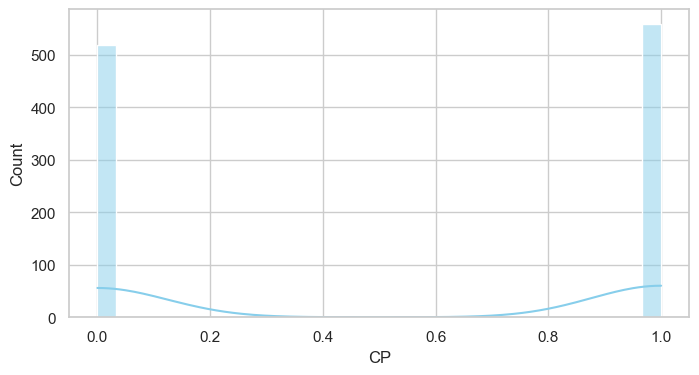

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: set style
sns.set(style="whitegrid")

# Plot KDE for each numeric feature
for column in filtered_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=filtered_data, x=column, kde=True, bins=30, color='skyblue')
    plt.show()


In [59]:
standardized_data.columns

Index(['Total Returns', 'EPS', 'Cash EPS', 'P/E', 'BV per Share', 'gdp change',
       'inflation', 'Assets', 'Debt/Equity (Times)',
       'Net profit before tax and extra ordinary income',
       'Return on Capital Employed (%)', 'Total profit before tax',
       'Dividend payout (%)', 'Net Profit Margin (%)',
       'Total profit (loss) for period', 'Return on Equity (%)',
       'Current Ratio (Times)', 'CP'],
      dtype='object')